<a href="https://colab.research.google.com/github/rahulvenkat207/Linear-Algebra-CodingWay/blob/main/Eigenvalues%20and%20Eigenvector/EigenValuesVectors_Notebook6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

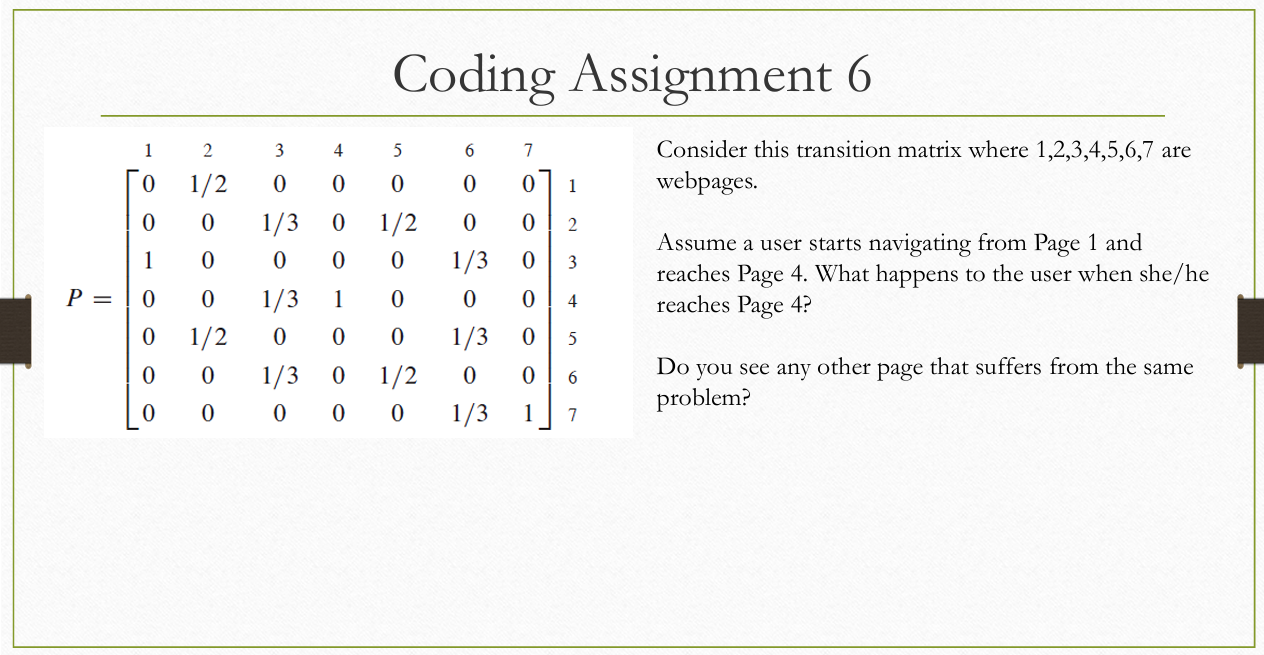

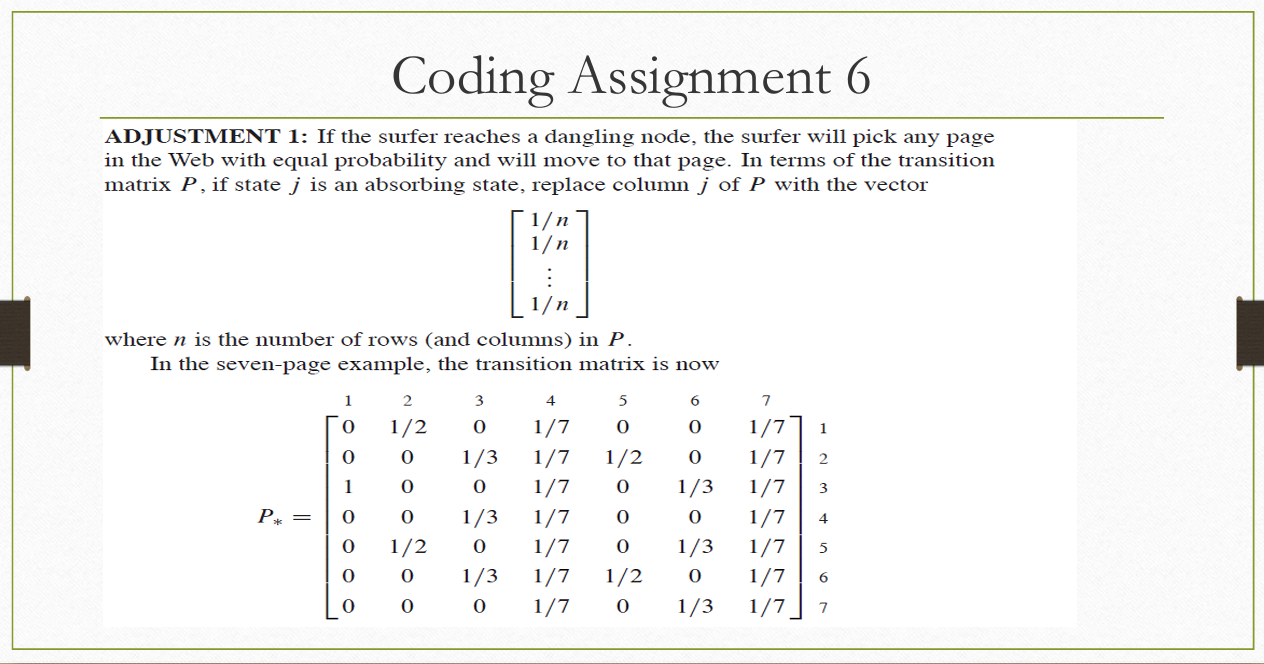

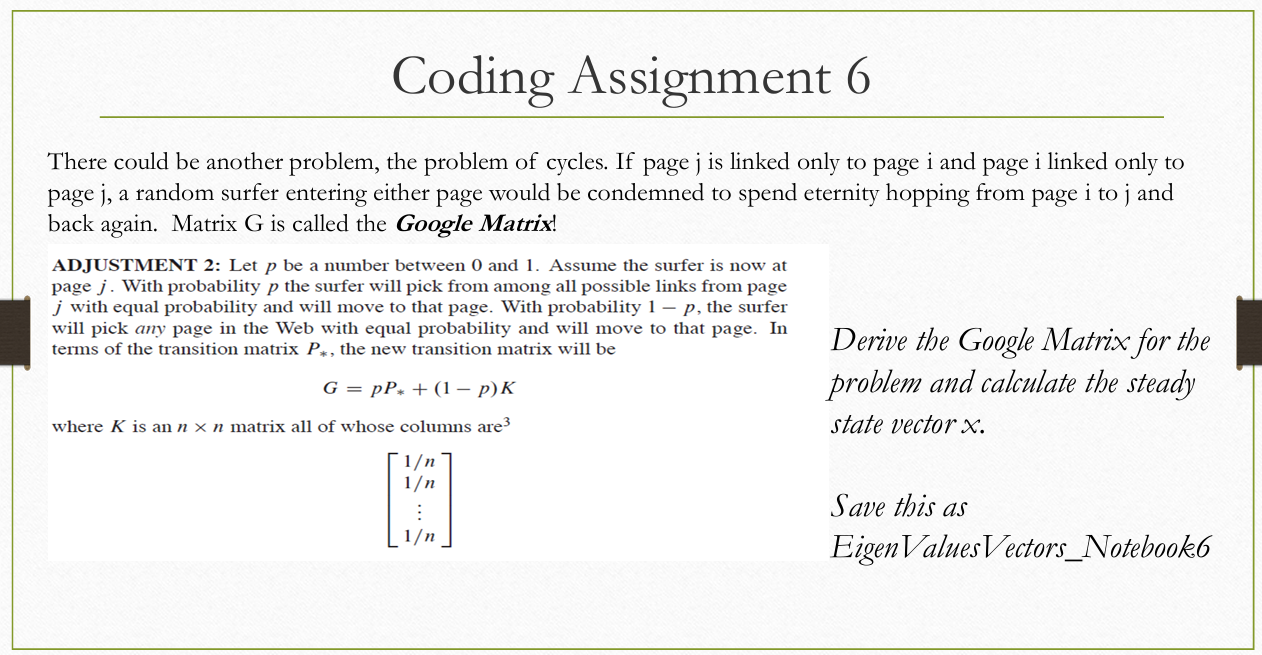

In [21]:
from IPython.display import Image, display

# Provide the correct file paths for the images
file_paths = [
    "/content/Screenshot 2024-04-29 222245.png",
    "/content/Screenshot 2024-05-02 005518.png",
    "/content/Screenshot 2024-05-02 005535.png"
]

# Display the images one after the other
for file_path in file_paths:
    display(Image(filename=file_path))



# **Steps:**
**Transition Matrix:** transition matrix , representing the probability of transitioning from one page to another based on the links in the network.

**Adjustment for Dangling Nodes:**
Some pages may have no outgoing links, leading to what are known as dangling nodes.
We adjust the transition matrix to handle dangling nodes by ensuring that if a column contains a dangling node, the corresponding column is replaced with uniform probabilities to other pages.

**Google Matrix Calculation:**
We calculate the Google Matrix using the adjusted transition matrix A and a damping factor.

**Matrix-Vector Multiplication:**
We define an initial probability vector x, representing the initial probability distribution of being on each page.
We perform matrix-vector multiplication using the Google Matrix G and the initial vector x to iteratively calculate the PageRank values for each page.
Each iteration of matrix-vector multiplication refines the PageRank values until convergence is achieved.

# Importing NumPy Library

In [22]:
import numpy as np

# Transition Matrix

In [23]:
P = [
    [0, 1/2, 0, 0, 0, 0, 0],
    [0, 0, 1/3, 0, 1/2, 0, 0],
    [1, 0, 0, 0, 0, 1/3, 0],
    [0, 0, 1/3, 1, 0, 0, 0],
    [0, 1/2, 0, 0, 0, 1/3, 0],
    [0, 0, 1/3, 0, 1/2, 0, 0],
    [0, 0, 0, 0, 0, 1/3, 1]
]


Adjustment 1 addresses this problem by ensuring that if we reach a dangling node, they can transition to any other page  with equal probability

# Function for Handling Dangling Node

In [24]:
def adjust_transition_matrix(P, start_node):
    n = len(P)
    for j in range(n):
        if j == start_node:
            continue
        if 1 in [row[j] for row in P]:  # If column j contains 1
            for i in range(n):
                P[i][j] = 1 / n
    return P

In [25]:
start_node = 0 # Page 1 is the start node

# Adjustment 1: Handling dangling nodes
adjusted_P = adjust_transition_matrix(P, start_node)

adjusted_P = np.array(P)
print("Adjusted matrix: ")
print(adjusted_P)

Adjusted matrix: 
[[0.         0.5        0.         0.14285714 0.         0.
  0.14285714]
 [0.         0.         0.33333333 0.14285714 0.5        0.
  0.14285714]
 [1.         0.         0.         0.14285714 0.         0.33333333
  0.14285714]
 [0.         0.         0.33333333 0.14285714 0.         0.
  0.14285714]
 [0.         0.5        0.         0.14285714 0.         0.33333333
  0.14285714]
 [0.         0.         0.33333333 0.14285714 0.5        0.
  0.14285714]
 [0.         0.         0.         0.14285714 0.         0.33333333
  0.14285714]]


In [26]:
def calculate_google_matrix(P, damping_factor):
    num_of_rows = len(P)
    p = (1 / num_of_rows) * np.ones((num_of_rows, num_of_rows))
    google_matrix = (1 - damping_factor) * p + damping_factor * P
    return google_matrix


In [27]:
# Damping factor
damping_factor = 0.85

# Calculate the Google matrix
G = calculate_google_matrix(adjusted_P, damping_factor)

print("Google Matrix G:")
print(G)


Google Matrix G:
[[0.02142857 0.44642857 0.02142857 0.14285714 0.02142857 0.02142857
  0.14285714]
 [0.02142857 0.02142857 0.3047619  0.14285714 0.44642857 0.02142857
  0.14285714]
 [0.87142857 0.02142857 0.02142857 0.14285714 0.02142857 0.3047619
  0.14285714]
 [0.02142857 0.02142857 0.3047619  0.14285714 0.02142857 0.02142857
  0.14285714]
 [0.02142857 0.44642857 0.02142857 0.14285714 0.02142857 0.3047619
  0.14285714]
 [0.02142857 0.02142857 0.3047619  0.14285714 0.44642857 0.02142857
  0.14285714]
 [0.02142857 0.02142857 0.02142857 0.14285714 0.02142857 0.3047619
  0.14285714]]


# calculating steady state Vector

In [28]:
def matrix_vector_multiply(matrix, vector):
    result = [0] * len(matrix)
    for i in range(len(matrix)):
        for j in range(len(vector)):
            result[i] += matrix[i][j] * vector[j]
    return result

In [29]:
# Define the initial vector x (start on Page 3)
x = [1, 0, 0, 0,0,0,0]

# Perform matrix-vector multiplication 100 times
for _ in range(100):
    # Perform matrix-vector multiplication
    x = matrix_vector_multiply(G, x)

# Print the composition of vector x after 100 iterations
print("Composition of vector x after 100 iterations starting from Page 1:")
for i, prob in enumerate(x):
    print(f"Page {i+1}: {prob}")

Composition of vector x after 100 iterations starting from Page 1:
Page 1: 0.11629342397141716
Page 2: 0.1685666093797633
Page 3: 0.19126256468498862
Page 4: 0.09884367497909786
Page 5: 0.16405396329568342
Page 6: 0.1685666093797633
Page 7: 0.09241315430928401
